In [248]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.special import jv,kv,jn_zeros

class dispersion_curve():
    def __init__(self,m,n):
        self.m=m
        self.n=n
        self.err=1e-5
        self.delta=0.01
        self.L=100
    
    def LP(self,V,U):
        W=np.sqrt(V**2-U**2)
        return U*jv(self.m+1,U)/jv(self.m,U)-W*kv(self.m+1,W)/kv(self.m,W)
    
    def TE(self,V,U):
        W=np.sqrt(V**2-U**2)
        return jv(1,U)/(U*jv(0,U))+kv(1,W)/(W*kv(0,W))
    
    def TM(self,V,U):
        W=np.sqrt(V**2-U**2)
        return jv(1,U)/(U*jv(0,U))+0.6*kv(1,W)/(W*kv(0,W))
    
    def EH(self,V,U):
        W=np.sqrt(V**2-U**2)
        return jv(self.m+1,U)/(U*jv(self.m,U))+kv(self.m+1,W)/(W*kv(self.m,W))
    
    def HE(self,V,U):
        W=np.sqrt(V**2-U**2)
        return jv(self.m-1,U)/(U*jv(self.m,U))-kv(self.m-1,W)/(W*kv(self.m,W))
      

    def Bifun(self,fun,V,a,b):
        error=1
        k=0
        while error>self.err or k<200:
            ya=fun(V,a)
            yb=fun(V,b)
            c=(a+b)/2
            
            # print(ya,yb)

            if ya*yb<=0:
                if ya*fun(V,c)<=0:
                    b=c
                else:
                    a=c
            else:
                return 0
            error=np.abs(ya-yb)
            k=k+1

        return (a+b)/2  
    
    def LP_curve(self):
        if self.m==0:
            if self.n==1:
                 Vmin=self.err
            else:
                Vmin=jn_zeros(self.m-1,self.n-1)[-1]+self.delta
        else:
            Vmin=jn_zeros(self.m-1,self.n)[-1]+self.delta
        

        U=np.linspace(0,0,100)
        B=np.linspace(0,0,100)
        V=np.linspace(Vmin,10,100)
        i=0

        if Vmin>10:
            return V,B
        
        for V0 in V:
            a=Vmin-self.err
            if V0<jn_zeros(self.m,self.n)[-1]:
                b=V0-self.err
            else:
                b=jn_zeros(self.m,self.n)[-1]-self.err
                
            U[i]=self.Bifun(self.LP,V0,a,b)
            if U[i]==0:
                B[i]=0
            else:
                B[i]=1-(U[i]/V0)**2
            i=i+1
            
        return V,B
    
    def TE_curve(self):
        
        Vmin=jn_zeros(0,self.n)[-1]+self.delta 
        
        U=np.linspace(0,0,100)
        B=np.linspace(0,0,100)
        V=np.linspace(Vmin,10,100)
        i=0
        
        for V0 in V:
            a=Vmin
            
            if V0<jn_zeros(1,self.n)[-1]:
                b=V0-self.err
            else:
                b=jn_zeros(1,self.n)[-1]-self.err
            
            # print(a,b)
               
            U[i]=self.Bifun(self.TE,V0,a,b)
            if U[i]==0:
                B[i]=0
            else:
                B[i]=1-(U[i]/V0)**2
            i=i+1
        
        
        return V,B
           
    def TM_curve(self):
        
        Vmin=jn_zeros(0,self.n)[-1]+self.delta 
        
        U=np.linspace(0,0,100)
        B=np.linspace(0,0,100)
        V=np.linspace(Vmin,10,100)
        i=0
        
        for V0 in V:
            a=Vmin
            
            if V0<jn_zeros(1,self.n)[-1]:
                b=V0-self.err
            else:
                b=jn_zeros(1,self.n)[-1]-self.err
            
            # print(a,b)
               
            U[i]=self.Bifun(self.TM,V0,a,b)
            if U[i]==0:
                B[i]=0
            else:
                B[i]=1-(U[i]/V0)**2
            i=i+1
              
        return V,B
    
    def EH_curve(self):
        
        Vmin=jn_zeros(self.m,self.n)[-1]+self.delta 
        
        U=np.linspace(0,0,100)
        B=np.linspace(0,0,100)
        V=np.linspace(Vmin,10,100)
        i=0
        
        for V0 in V:
            a=Vmin
            
            if V0<jn_zeros(self.m+1,self.n)[-1]:
                b=V0-self.err
            else:
                b=jn_zeros(self.m+1,self.n)[-1]-self.err
            
            # print(a,b)
               
            U[i]=self.Bifun(self.EH,V0,a,b)
            if U[i]==0:
                B[i]=0
            else:
                B[i]=1-(U[i]/V0)**2
            i=i+1
              
        return V,B   
        
    def HE_curve(self):
        
        if self.m==1:
            if self.n==1:
                Vmin=self.err
            else:
                Vmin=jn_zeros(1,self.n-1)[-1]+self.delta 
        else:
            Vmin=jn_zeros(self.m-2,self.n)[-1]+self.delta 
            
        U=np.linspace(0,0,100)
        B=np.linspace(0,0,100)
        V=np.linspace(Vmin,10,100)
        i=0
            
        for V0 in V:
            a=Vmin
                
            if V0<jn_zeros(self.m-1,self.n)[-1]:
                b=V0-self.err
            else:
                b=jn_zeros(self.m-1,self.n)[-1]-self.err
                
                # print(a,b)
                
            U[i]=self.Bifun(self.HE,V0,a,b)
            if U[i]==0:
                B[i]=0
            else:
                B[i]=1-(U[i]/V0)**2
            i=i+1
                
        return V,B   


d:\APP\Python\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
d:\APP\Python\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
d:\APP\Python\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
d:\APP\Python\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
d:\APP\Python\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
d:\APP\Python\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
d:\APP\Python\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
d:\APP\Python\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
d:\APP\Python\lib\site-packages\ipykernel_launcher.py:31

Text(0, 0.5, 'B')

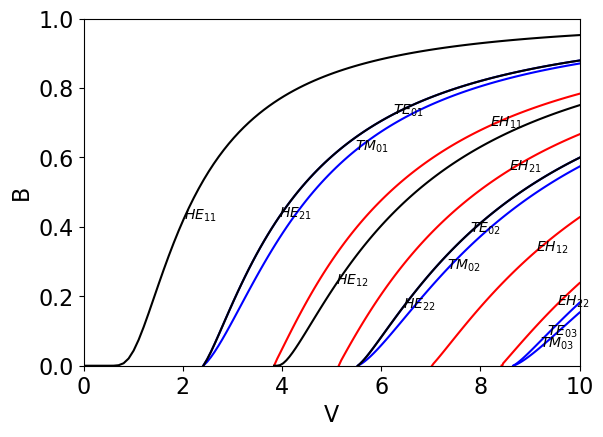

In [252]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16}) 

fig,ax=plt.subplots()


for i in [1,2,3]:
    DC=dispersion_curve(0,i)
    V,B=DC.TE_curve()
    plt.plot(V,B,'b')
    plt.text(V[50],B[50],'$TE_{0'+str(i)+'}$',fontdict={'size':'10'})
    
    V,B=DC.TM_curve()
    plt.plot(V,B,'b')
    plt.text(V[40],B[40],'$TM_{0'+str(i)+'}$',fontdict={'size':'10'})
    

for i in [1,2]:
    for j in [1,2]:
        DC=dispersion_curve(i,j)
        V,B=DC.EH_curve()
        plt.plot(V,B,'r')
        plt.text(V[70],B[70],'$EH_{'+str(i)+str(j)+'}$',fontdict={'size':'10'})

        DC=dispersion_curve(i,j)
        V,B=DC.HE_curve()
        plt.plot(V,B,'k')
        plt.text(V[20],B[20],'$HE_{'+str(i)+str(j)+'}$',fontdict={'size':'10'})

    

plt.xlim(0,10)
plt.ylim(0,1)
ax.set_aspect(7)
plt.xlabel("V")
plt.ylabel("B")


Text(0, 0.5, 'B')

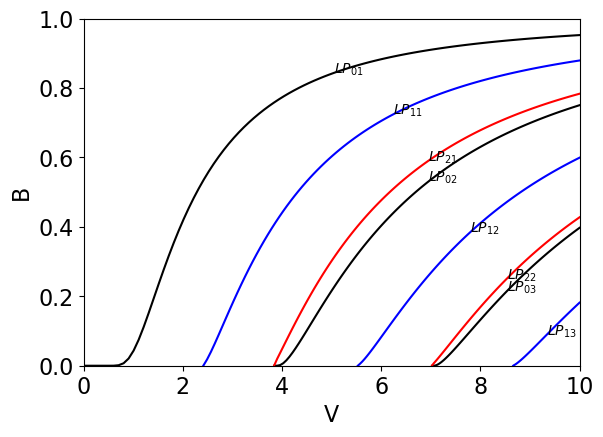

In [216]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16}) 

fig,ax=plt.subplots()

c=['k','b','r']
for i in [0,1,2]:
    for j in [1,2,3]:
        if i==2 and j==3:
            break
        LP=dispersion_curve(i,j)
        V,B=LP.LP_curve()
        plt.plot(V,B,color=c[i])
        plt.text(V[50],B[50],'$LP_{'+str(i)+str(j)+'}$',fontdict={'size':'10'})

plt.xlim(0,10)
plt.ylim(0,1)
ax.set_aspect(7)
plt.xlabel("V")
plt.ylabel("B")


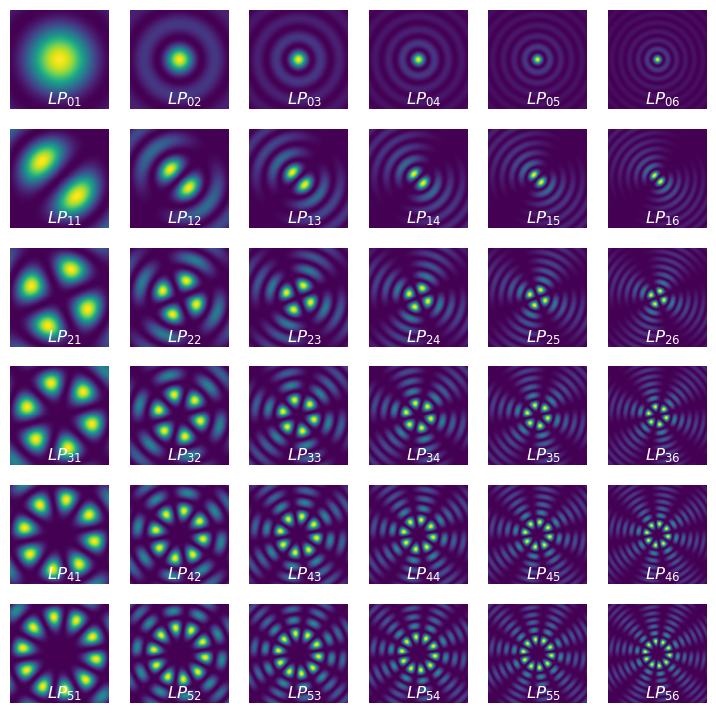

In [51]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.special import jv,kv,jn_zeros
import matplotlib
matplotlib.rcParams.update({'font.size': 16}) 


def I(U,m,x,y):
    r=np.sqrt(x**2+y**2)
    phi=np.arctan(y/x)
    return np.cos(m*phi-np.pi/4)**2*(jv(m,U*r)/jv(m,U))**2

x0=np.linspace(-1,1,200)
y0=np.linspace(-1,1,200)
x,y=np.meshgrid(x0,y0)

fig,ax=plt.subplots(nrows=6,ncols=6,figsize=(9,9))



for m in [0,1,2,3,4,5]:
    for n in [1,2,3,4,5,6]:
        U=jn_zeros(m,n)[-1]-0.2        
        ax[m,n-1].imshow(I(U,m,x,y))
        ax[m,n-1].axis('off')
        ax[m,n-1].set_aspect(1)
        ax[m,n-1].text(75,190,"$LP_{"+str(m)+str(n)+"}$",fontdict={'color':'white','size':'12'})
    
    